In [3]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Experiment 1a - Uncoupled 3-box

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [77]:
import run_all_exp
basis, degree = 'hermite', 1
run_all_exp.run_all(basis, degree)

Running Experiments...


/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


Emulating with DMD...
Train: 2xCO2 - L2 Error


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [71]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run experiments
scenarios = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, scen in enumerate(scenarios):
  full_outputs[scen] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i, n_boxes=n_boxes)
  forcings[scen] = np.tile(full_outputs[scen]['forcing_ts'], (n_boxes, 1))
  T_out[scen] = np.squeeze(full_outputs[scen]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


### Method X: DMD

In [76]:
error_metrics_DMD['2xCO2']['2xCO2']

[array([0.00015394, 0.00240838, 0.00033654]),
 array([0.0001509, 0.0004423, 0.0001217]),
 array([1.50898523e-04, 2.60680487e-04, 8.87193081e-05]),
 array([0.42310116, 0.40328456, 0.41113177])]

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - [array([0.00015394, 0.00240838, 0.00033654]), array([0.0001509, 0.0004423, 0.0001217]), array([1.50898523e-04, 2.60680487e-04, 8.87193081e-05]), array([0.42310116, 0.40328456, 0.41113177])]
	Test: High Emissions - [array([0.0060895 , 0.0341309 , 0.01169897]), array([0.00376274, 0.02142722, 0.00733659]), array([0.00376274, 0.02142722, 0.00733659]), array([1.43699875, 1.52717279, 1.44581709])]
	Test: Overshoot - [array([0.00472365, 0.02102949, 0.00761537]), array([0.00330313, 0.01547593, 0.00549398]), array([0.00330313, 0.00556837, 0.00265408]), array([3.08545728, 2.75625617, 2.73403813])]
Train: High Emissions - L2 Error
	Test: 2xCO2 - [array([0.02128886, 0.04888458, 0.0188523 ]), array([0.01897411, 0.04877356, 0.0186248 ]), array([-0.01897242, -0.04851883, -0.01860782]), array([-0.60820939, -0.73511184, -0.63712461])]
	Test: High Emissions - [array([2.24956851e-06, 3.73494633e-05, 5.23375378e-06]), array([2.21731829e-06, 6.80455081e-06, 1.84988943

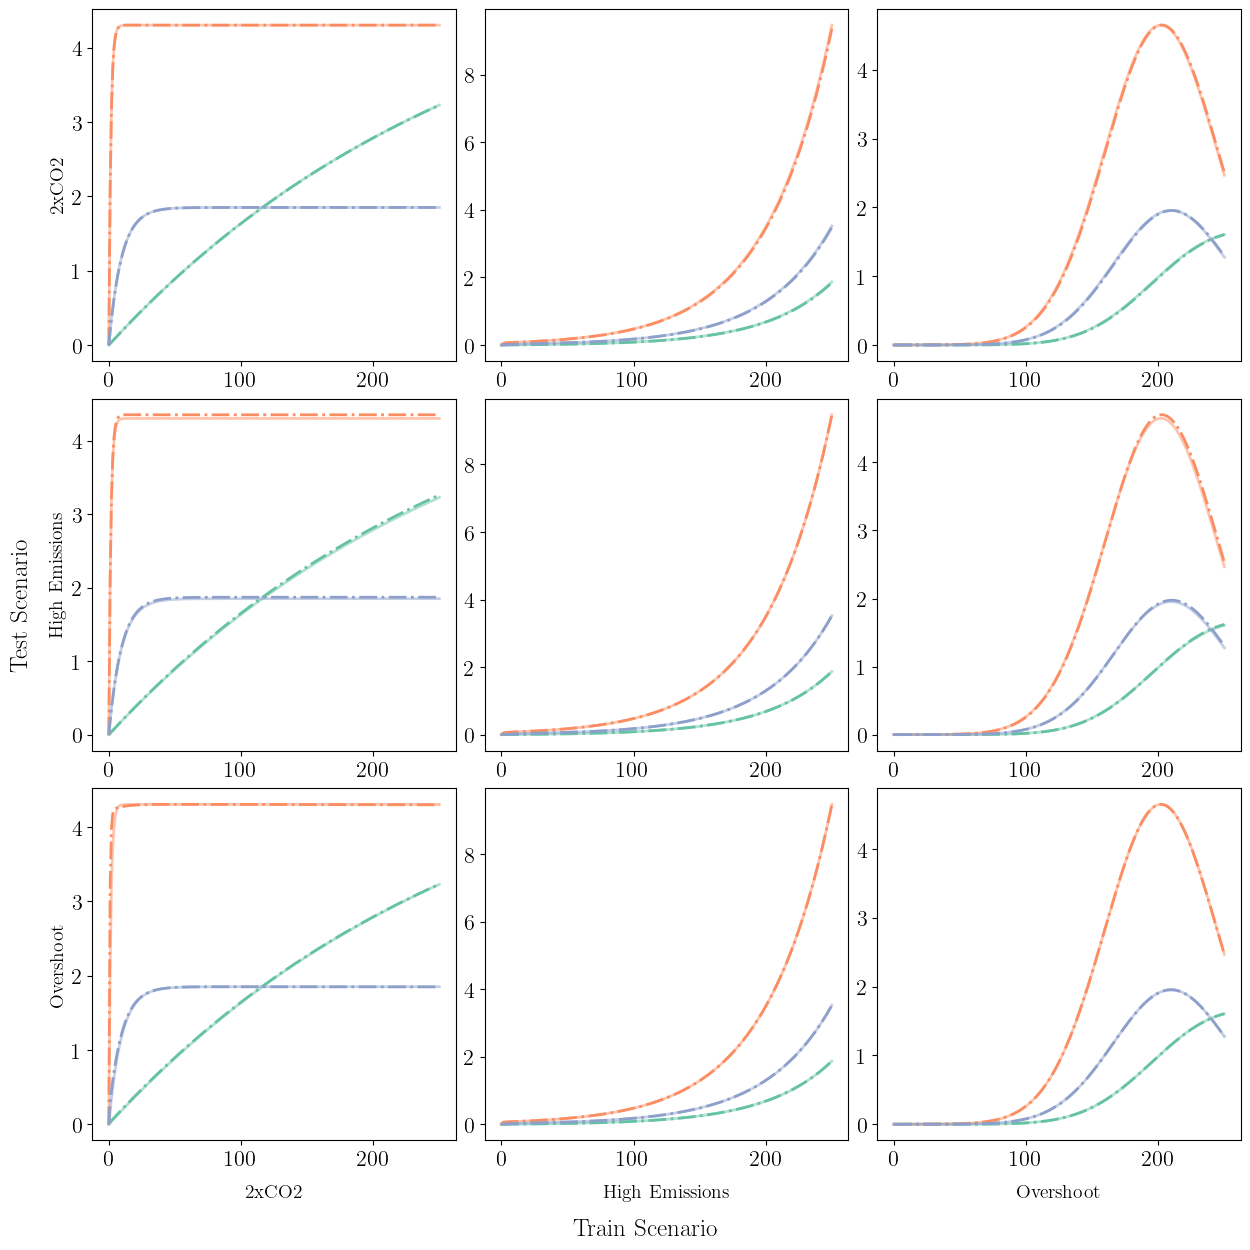

In [73]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD, error_metrics_DMD = emulator_utils.emulate_scenarios('DMD', scenarios=scenarios, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt, n_steps=n_steps, n_boxes=n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, scenarios)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.03860367970277439
	Test: High Emissions - 0.579702876430624
	Test: Overshoot - 0.3621589124811575
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8959799955023138
	Test: High Emissions - 0.0005985701472533657
	Test: Overshoot - 0.5596741242344851
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1.4619034219238627
	Test: High Emissions - 0.022465023642424548
	Test: Overshoot - 0.00045147824382942296


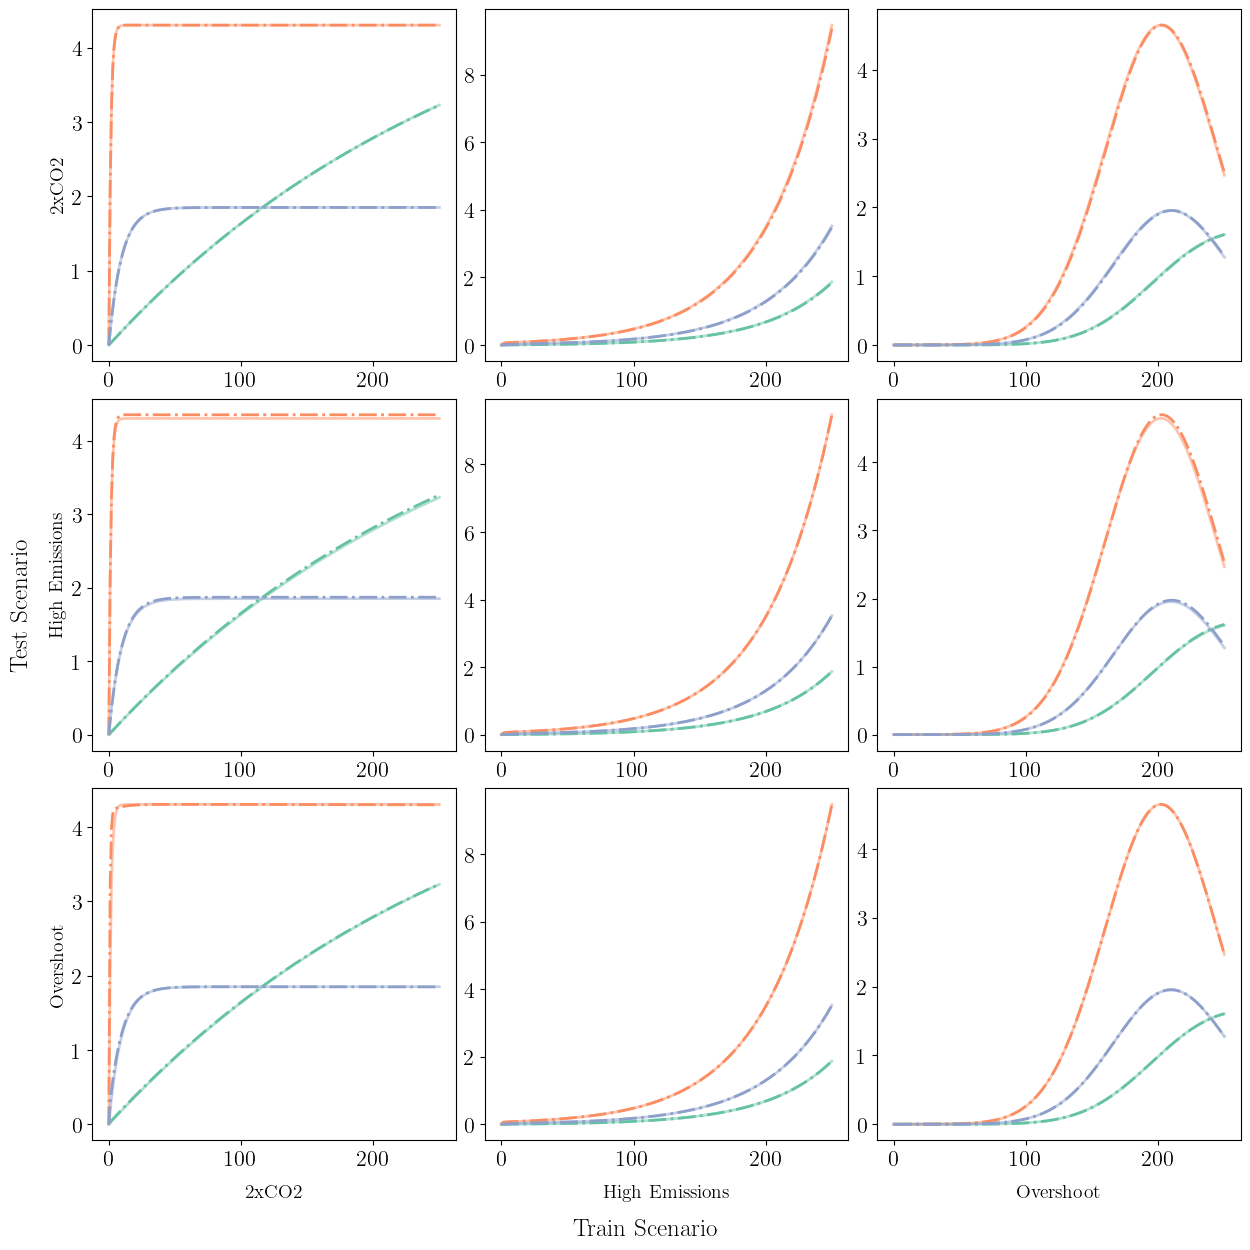

In [59]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='hermite', degree=1)
F_dict = emulator_utils.Vector_Dict(method='hermite', degree=1)
operator_EDMD, T_pred_EDMD, L2_EDMD = emulator_utils.emulate_experiments('EDMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 2.13308779473121e-14
	Test: High Emissions - 0.565307660478443
	Test: Overshoot - 0.35421144543522953
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8753618633080136
	Test: High Emissions - 3.1024171503776466e-14
	Test: Overshoot - 0.5472872401232058
Train: Overshoot - L2 Error
	Test: 2xCO2 - 972431.3764607814
	Test: High Emissions - 16018.89210791696
	Test: Overshoot - 4.4099480565561345e-14


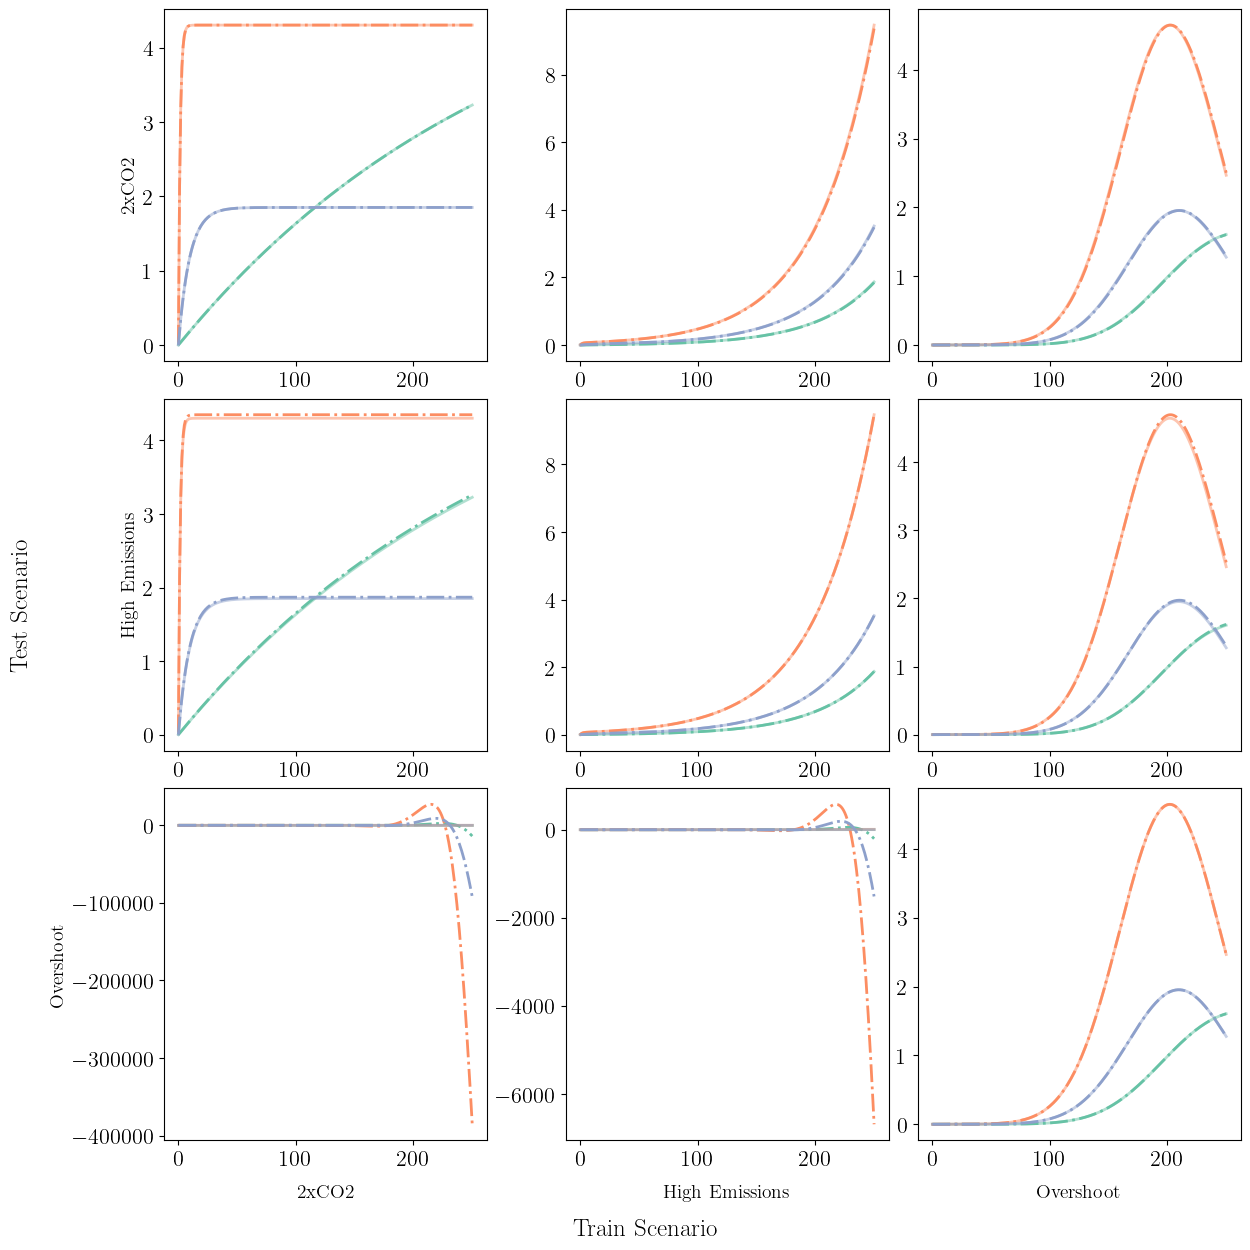

In [45]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve, L2_deconvolve = emulator_utils.emulate_experiments('deconvolve', experiments=experiments, outputs=T_out, forcings=forcings, dt=dt)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

In [60]:
operator_direct, T_pred_direct, L2_direct = emulator_utils.emulate_experiments('direct', experiments=experiments, outputs=T_out, forcings=forcings, n_boxes=n_boxes, dt=dt)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

AttributeError: module 'emulator_utils' has no attribute 'emulate_experiments'

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.40643473  0.93829432  0.39083387 -0.77395606]
	Test: 2xCO2 - 14.78599975224437
	Test: High Emissions - 11.359054576377703
	Test: Overshoot - 8.8241623600072
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.182428    0.92840055  0.34528177 -0.75920116]
	Test: 2xCO2 - 21.93287822793775
	Test: High Emissions - 0.1295028364096059
	Test: Overshoot - 5.445063844489383
Train: Overshoot - L2 Error
Exponential Fit Results:
 [-0.78195444 -3.18455931 -1.31757632 -0.76892125]
	Test: 2xCO2 - 19.497526133565977
	Test: High Emissions - 2.9592380443931283
	Test: Overshoot - 4.867397702952811


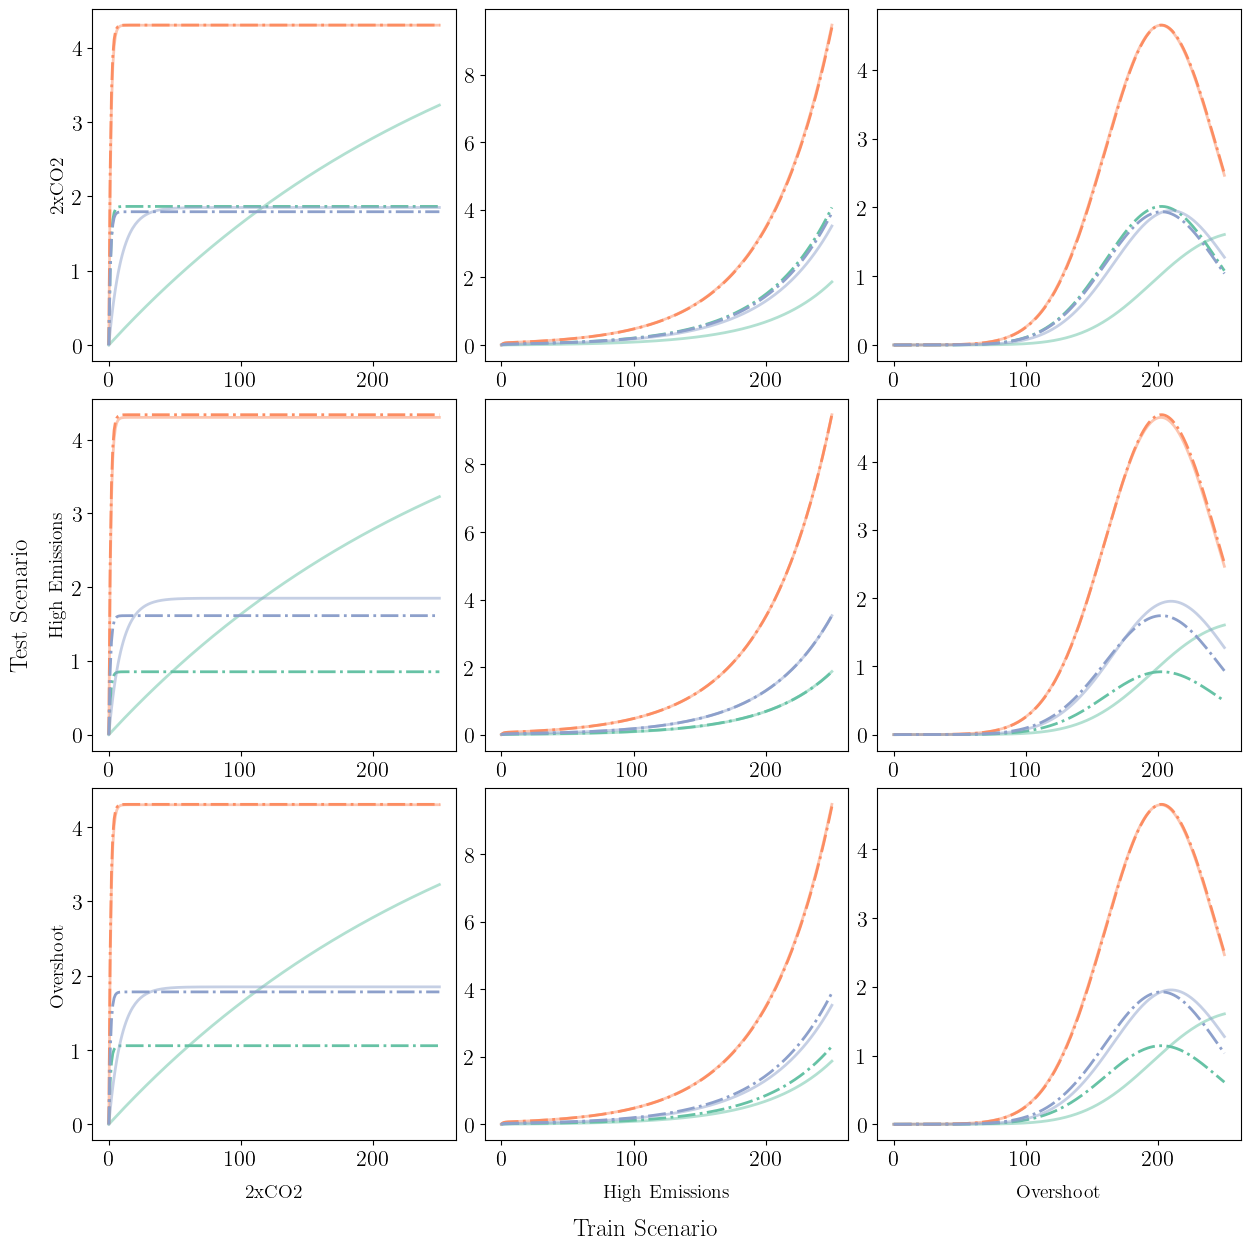

In [47]:
operator_fit, T_pred_fit, L2_fit = emulator_utils.emulate_experiments('fit', experiments=experiments, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=1, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)

### Method X: Exponential Fit w/ DMD as Initial Guess

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 1.1690839   2.69894461  1.12420916 -0.77395603]
	Test: 2xCO2 - 14.785999752245406
	Test: High Emissions - 11.359054891425538
	Test: Overshoot - 8.824162321878408
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.48345485  2.46036645  0.91503572 -0.75920115]
	Test: 2xCO2 - 21.932878105229985
	Test: High Emissions - 0.12950283640619567
	Test: Overshoot - 5.445063897166246
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.30575391  1.24520574  0.51519004 -0.76892124]
	Test: 2xCO2 - 19.497557615676975
	Test: High Emissions - 2.959208663803434
	Test: Overshoot - 4.86739770303706


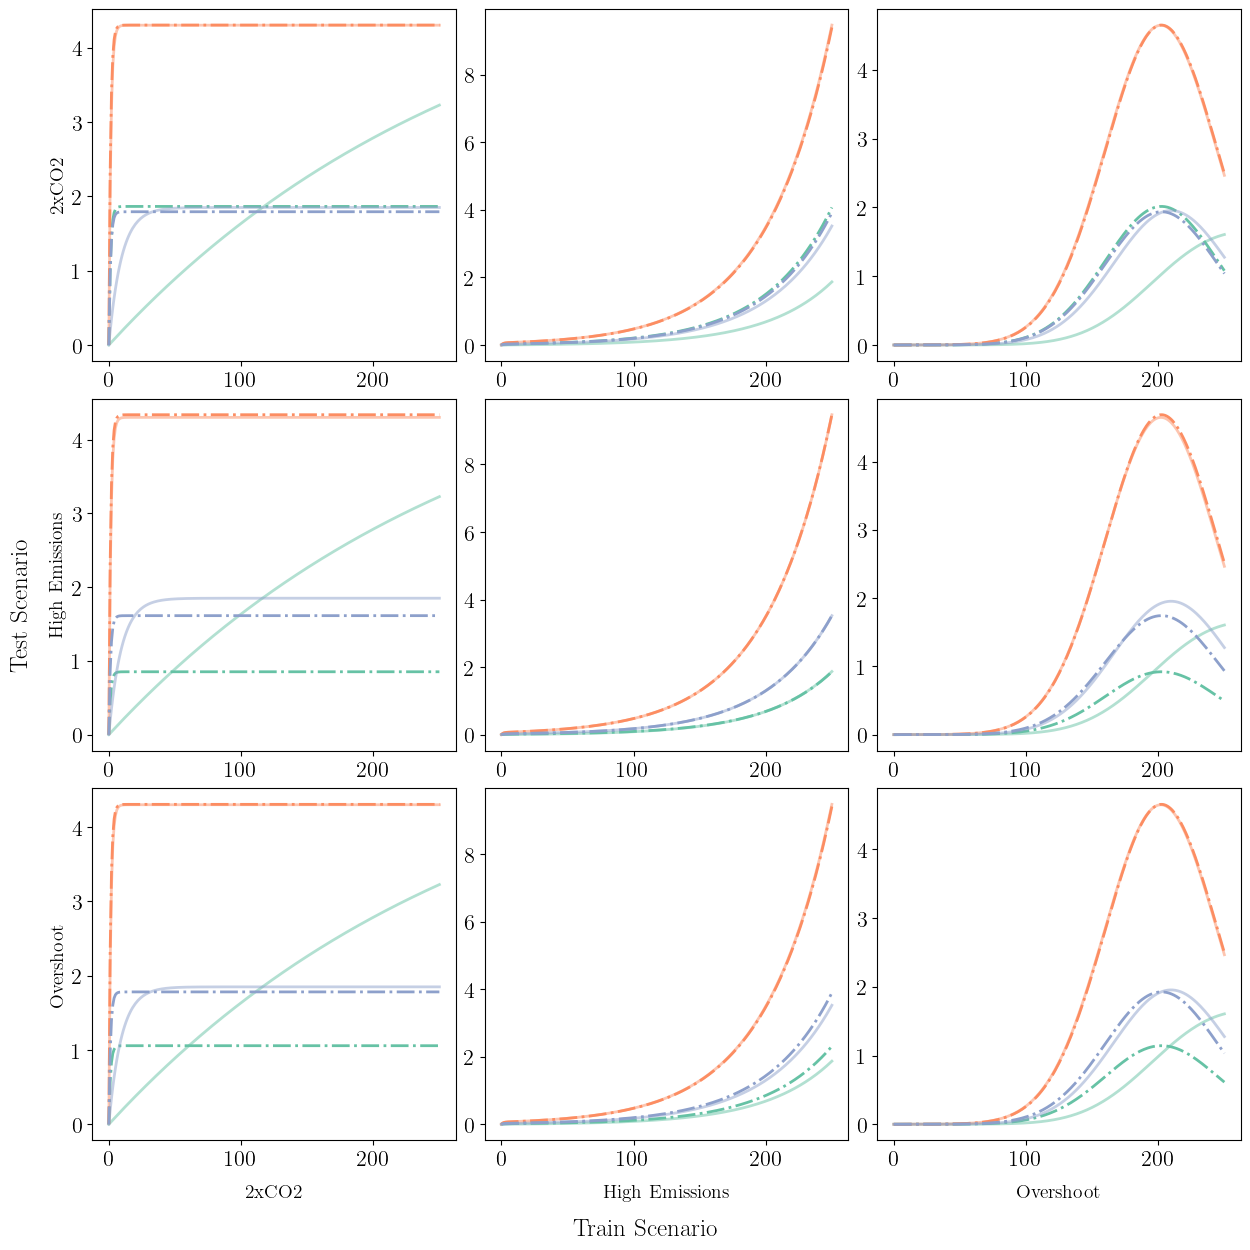

In [48]:
operator_fit_DMD, T_pred_fit_DMD, L2_fit_DMD = emulator_utils.emulate_experiments('fit_DMD', experiments=experiments, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=1, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit_DMD, experiments)

In [18]:
pattern = emulator_utils.method_0_PS(T_out['2xCO2'])

(3, 251)


Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 13.994758025857227
	Test: High Emissions - 12.052432826142262
	Test: Overshoot - 9.24911690633119
Train: High Emissions - L2 Error
	Test: 2xCO2 - 24.65544146001713
	Test: High Emissions - 0.14331971831336818
	Test: Overshoot - 6.24730126556051
Train: Overshoot - L2 Error
	Test: 2xCO2 - 20.25841282482834
	Test: High Emissions - 3.802768248701675
	Test: Overshoot - 5.296261557159373


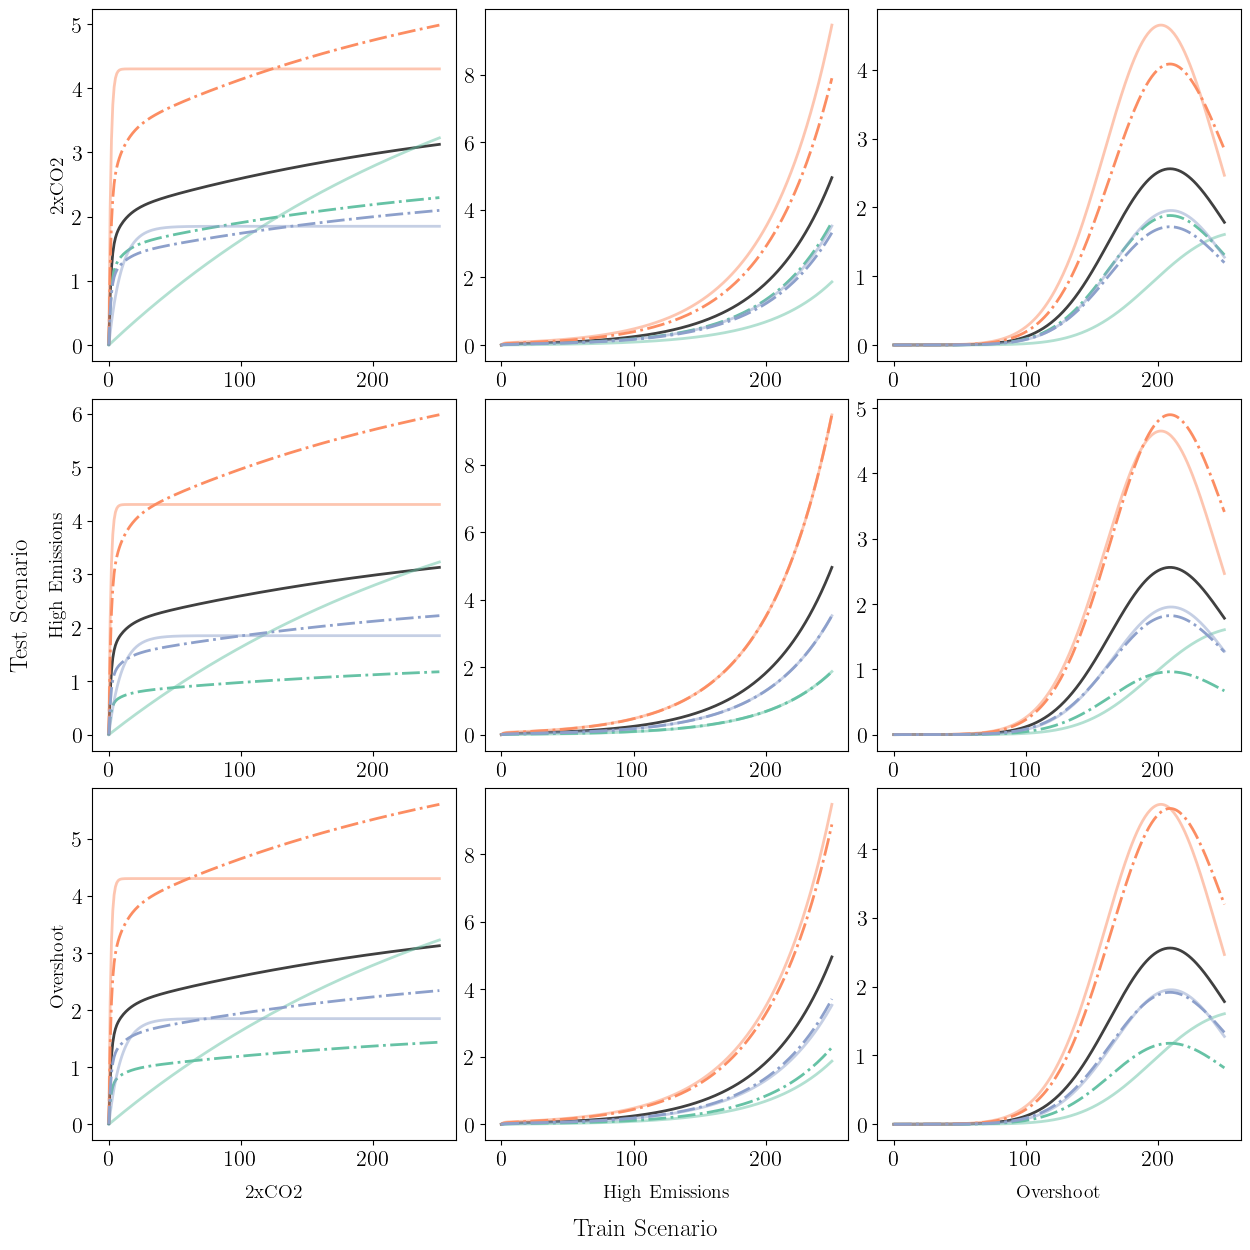

In [45]:
operator_PS, T_pred_PS, L2_PS = emulator_utils.emulate_experiments('PS', experiments=experiments, outputs=T_out, forcings=forcings)
emulator_utils.plot_true_pred(T_out, T_pred_PS, experiments, operator='PS')